In [6]:
variances

[]

In [10]:
data[path].keys()

dict_keys(['collision_reward', 'right_lane_reward', 'high_speed_reward', 'on_road_reward', 'steps'])

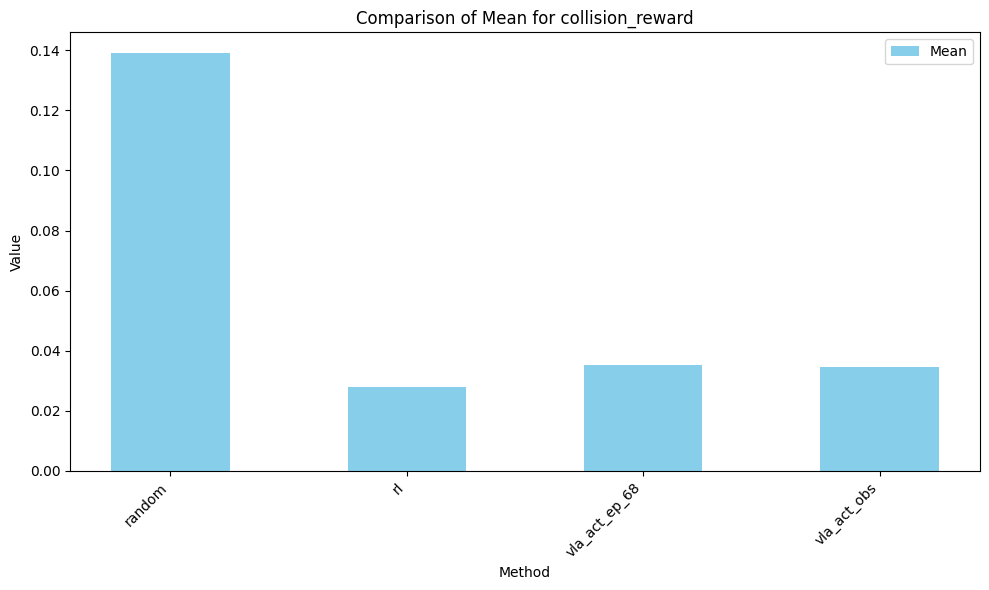

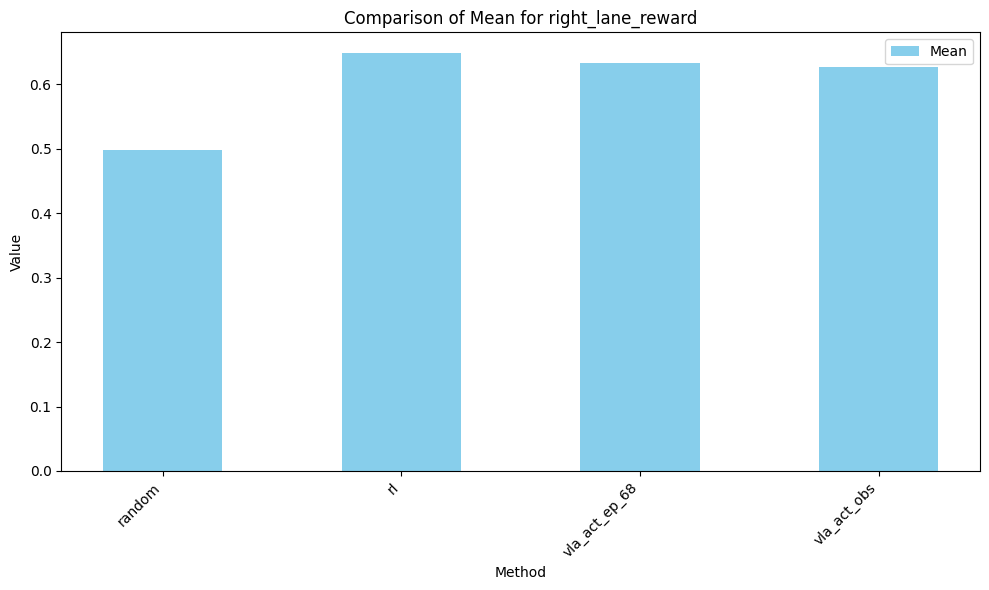

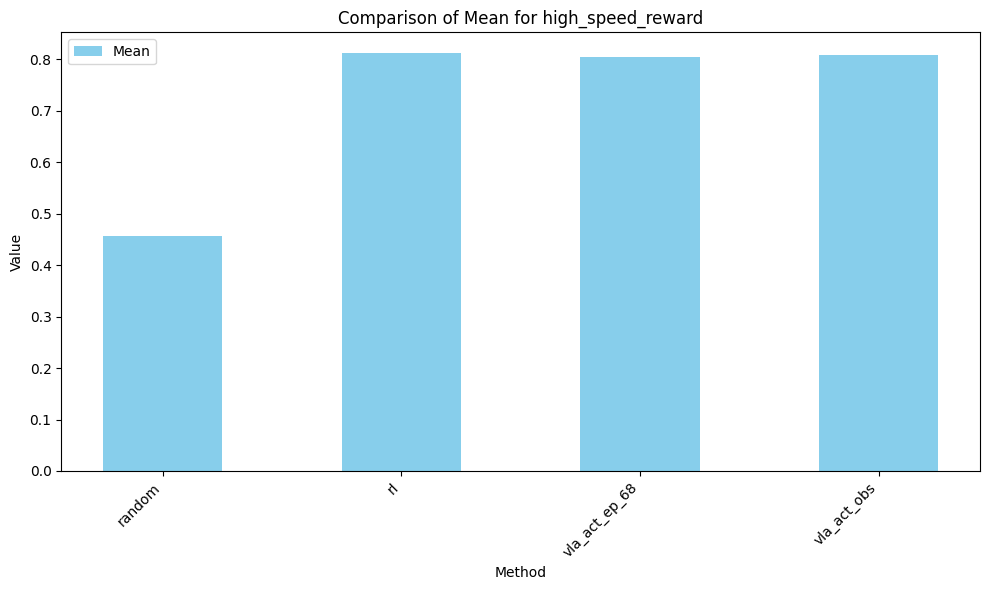

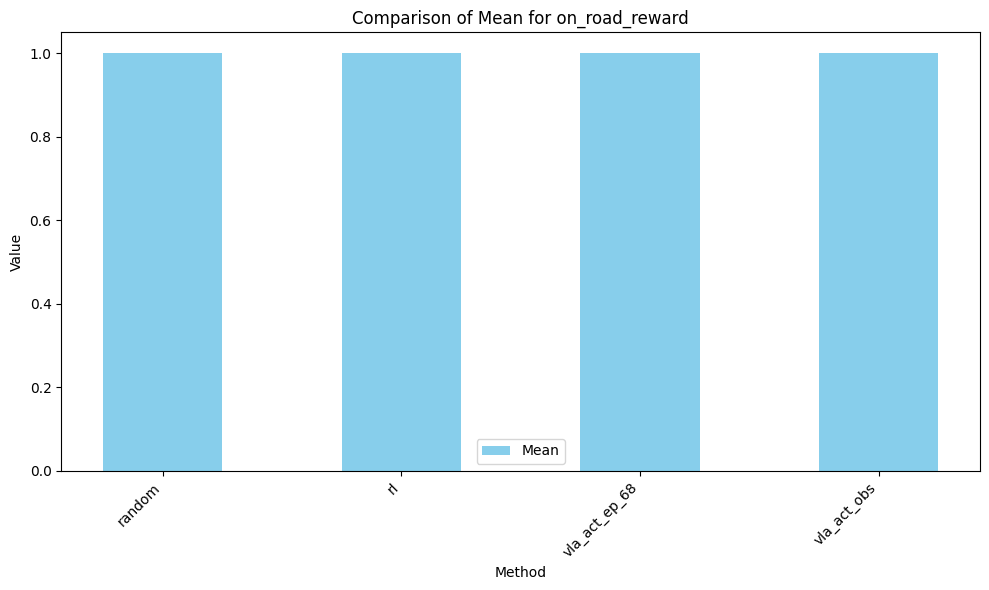

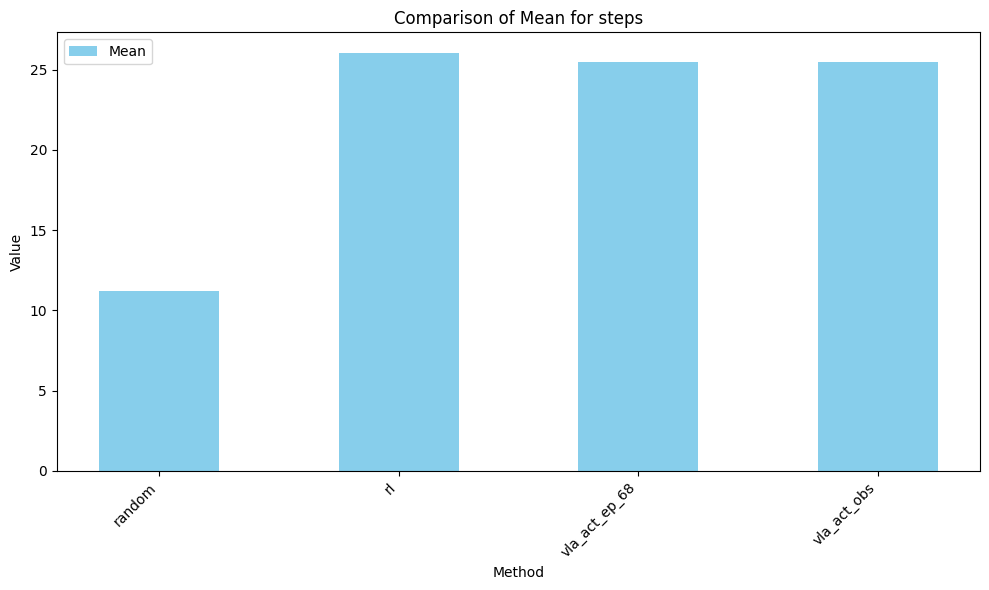

In [13]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the user's files
file_paths = [
    'random.json',
    'rl.json',
    'vla_act_ep_68.json',
    'vla_act_obs.json'
]

# Read the json files
data = {}
for path in file_paths:
    with open(path) as f:
        data[path] = json.load(f)

# Extract methods and metrics
methods = list(data.keys())

for metric_key in data[path].keys():
  # Calculate the mean and variance for each method
  means = []
  variances = []
  # Adjusting the plot to have mean and variance stacked on the same bar
  fig, ax = plt.subplots(figsize=(10, 6))

  # Means and variances for the single metric (collision_reward) to be stacked on the same bar
  means = []
  variances = []

  for method in methods:
      if metric_key in data[method]:
          rewards = data[method][metric_key]
          means.append(np.mean(rewards))
          variances.append(np.var(rewards))

  # Plot stacked bars
  x = np.arange(len(methods))
  width = 0.5

  # Plot mean
  ax.bar(x, means, width, label='Mean', color='skyblue')

  # Add labels and title
  ax.set_xlabel('Method')
  ax.set_ylabel('Value')
  ax.set_title('Comparison of Mean for {}'.format(metric_key))
  ax.set_xticks(x)
  ax.set_xticklabels([method.split('/')[-1].split('.')[0] for method in methods], rotation=45, ha="right")
  ax.legend()

  plt.tight_layout()
  plt.show()
